# LOCAL SEARCH - ANÁLISE DE RESULTADOS

 - ITA | PG-CTE-S | TE-282 - Meta-heurísticas
 - Professor Dr. Angelo Passaro
 - Aluno: Rafael Caneiro de Oliveira
 - Versao: 0.1
 - Data: 26/10/2021

## Bibliotecas | Parâmetros | Funções

In [7]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from ast import literal_eval

PATH = Path.cwd().parent
RAW_PATH = Path(PATH, "./data/raw/") 
LOG_PATH = Path(PATH, "./data/log/")
print(LOG_PATH)


/home/rco/github/s_metaheuristic/data/log


In [8]:
def read_port_files(n_port):
    filepath = Path(RAW_PATH, 'port' + str(n_port) + '.txt')
    with open(filepath) as fp:
        # quantidade de ativos no portfolio
        n_assets = int(fp.readline())
        # armazena as estatisticas do ativo
        r_mean = []
        r_std = []
        for n in range(n_assets):
            line = fp.readline()
            r_mean.append(float(line.strip().split()[0]))
            r_std.append(float(line.strip().split()[1]))

        # obtem o restante da matriz de covariancia
        cnt = 32
        i = []
        j = []
        cov = []
        line = fp.readline()
        while line:
            i.append(int(line.strip().split(' ')[0]))
            j.append(int(line.strip().split(' ')[1]))
            cov.append(float(line.strip().split(' ')[2]))
            line = fp.readline()
    fp.close()
    # retorna dataframe com estatisticas dos ativos do portfolio
    df_stats = pd.DataFrame({'port':n_port,
                             'i':[i_+1 for i_ in range(n_assets)],
                             'r_mean':r_mean,
                             'r_std':r_std})
    print(df_stats.shape)

    # retorna dataframe com matriz de covariancia dos ativos do portfolio
    df_cov_mx = pd.DataFrame({'port':n_port,
                             'i':i,
                             'j':j,
                             'cov':cov})
    print(df_cov_mx.shape)
    return df_stats, df_cov_mx

## Carrega Dados

In [9]:
df_stats_list = []
df_cov_mx_list =[]
for p in range(1,6,1):
    df_stats, df_cov_mx = read_port_files(p)
    df_stats_list.append(df_stats)
    df_cov_mx_list.append(df_cov_mx)
    
df_stats = pd.concat(df_stats_list)
df_cov_mx = pd.concat(df_cov_mx_list)

(31, 4)
(496, 4)
(85, 4)
(3655, 4)
(89, 4)
(4005, 4)
(98, 4)
(4851, 4)
(225, 4)
(25425, 4)


In [10]:
portfolios = {
    1:'Hang Seng - Hong Kong',
    2:'DAX - German Blue Chips',
    3:'FTSE - London',
    4:"S&P - Standard and Poor's 500 - US",
    5:'Nikkei - Tokyo'
}
df_stats['portfolio'] = df_stats.port.map(portfolios)
df_cov_mx['portfolio'] = df_cov_mx.port.map(portfolios)

In [11]:
uefs = []
for port in range(5):
    uef = pd.read_csv(Path(RAW_PATH, 'portef' + str(port+1) + '.txt'), header=None, sep='\s+')
    uef.columns = ['mean_return', 'var_return']
    uef['port'] = port + 1
    uefs.append(uef)
uef = pd.concat(uefs, ignore_index=True).reset_index(drop=True)
uef['portfolio'] = uef.port.map(portfolios)
uef.head()

mean_return  var_return  port              portfolio
0     0.010865    0.004776     1  Hang Seng - Hong Kong
1     0.010861    0.004768     1  Hang Seng - Hong Kong
2     0.010857    0.004760     1  Hang Seng - Hong Kong
3     0.010853    0.004752     1  Hang Seng - Hong Kong
4     0.010849    0.004745     1  Hang Seng - Hong Kong

In [12]:
all_dfs = []
best_dfs = []
LOGs = str(LOG_PATH) + '/*.csv'

c = 0
for file in glob.glob(str(LOGs)):
    filename = file[file.find('/log/')+5:]
    try:
        df = pd.read_csv(file, low_memory=False, sep=',', quotechar='"')
        c = c + 1
    except:
        print('Arquivo não importado: {}'.format(filename))
    df['filename'] = filename
    df['X'] = df.X.str[1:-1].str.split().apply(lambda x: [float(y) for y in x])
    df['Z'] = df.Z.str[1:-1].str.split().apply(lambda x: [float(y) for y in x])
    df['Q'] = df.Z.apply(lambda x: np.sum(np.array(x)))
    all_dfs.append(df)
    best_dfs.append(df[-1:])

all_data = pd.concat(all_dfs, ignore_index=True).reset_index(drop=True)
all_data.rename({'move_strategy':'move_str',
                 'selection_strategy':'selec_str'}, axis=1, inplace=True)

best_data = pd.concat(best_dfs, ignore_index=True).reset_index(drop=True)
best_data.rename({'move_strategy':'move_str',
                  'selection_strategy':'selec_str'}, axis=1, inplace=True)

print('Importados {} arquivos'.format(c))

all_data.head()


Importados 211 arquivos


iter       obj   aug_obj    return  \
0     0  0.043447  0.043447  0.002783   
1     1  0.034563  0.034563  0.002796   
2     2  0.028650  0.028650  0.002804   
3     3  0.024449  0.024449  0.002809   
4     4  0.021316  0.021316  0.002813   

                                                   X  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   Z  max_iter  neighbours  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   

   alpha  exp_return  n_port  k move_str  seed selec_str  \
0    0.1       0.001       4  3     best    49    random   
1    0.1       0.001       4  3     best    49    random   
2    0.1       0.001       4  3     best    49    random   
3    0.1       0.001       4  3     best    49    random   
4    0.1       0.001       4  3     best    49    random   

                             filename    Q  
0  log_gls_20211116_204909_283918.csv  3.0  
1  log_gls_20211116_204909_283918.csv  3.0  
2  log_gls_20211116_204909_283918.csv  3.0  
3  log_gls_20211116_204909_283918.csv  3.0  
4  log_gls_20211116_204909_283918.csv  3.0

In [13]:
all_data[all_data.obj=='[0.035848]']

Empty DataFrame
Columns: [iter, obj, aug_obj, return, X, Z, max_iter, neighbours, alpha, exp_return, n_port, k, move_str, seed, selec_str, filename, Q]
Index: []

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63300 entries, 0 to 63299
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iter        63300 non-null  int64  
 1   obj         63300 non-null  float64
 2   aug_obj     63300 non-null  float64
 3   return      63300 non-null  float64
 4   X           63300 non-null  object 
 5   Z           63300 non-null  object 
 6   max_iter    63300 non-null  int64  
 7   neighbours  63300 non-null  int64  
 8   alpha       63300 non-null  float64
 9   exp_return  63300 non-null  float64
 10  n_port      63300 non-null  int64  
 11  k           63300 non-null  int64  
 12  move_str    63300 non-null  object 
 13  seed        63300 non-null  int64  
 14  selec_str   63300 non-null  object 
 15  filename    63300 non-null  object 
 16  Q           63300 non-null  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 8.2+ MB


In [15]:
all_data.obj.value_counts()

 0.002093    900
 0.000282    600
 0.003781    600
 0.001657    552
 0.004750    300
            ... 
-0.008260      1
-0.008425      1
-0.009333      1
-0.009940      1
 0.002540      1
Name: obj, Length: 13875, dtype: int64

In [16]:
all_data.iter.value_counts()

0      211
206    211
204    211
203    211
202    211
201    211
200    211
199    211
198    211
197    211
196    211
195    211
194    211
193    211
192    211
191    211
190    211
205    211
207    211
188    211
208    211
223    211
222    211
221    211
220    211
219    211
218    211
217    211
216    211
215    211
214    211
213    211
212    211
211    211
210    211
209    211
189    211
187    211
1      211
168    211
166    211
165    211
164    211
163    211
162    211
161    211
160    211
159    211
158    211
157    211
156    211
155    211
154    211
153    211
152    211
167    211
169    211
186    211
170    211
185    211
184    211
183    211
182    211
181    211
180    211
179    211
178    211
177    211
176    211
175    211
174    211
173    211
172    211
171    211
224    211
225    211
226    211
281    211
279    211
278    211
277    211
276    211
275    211
274    211
273    211
272    211
271    211
270    211
269    211
268    211
267    211

## Portfólios

### Geral

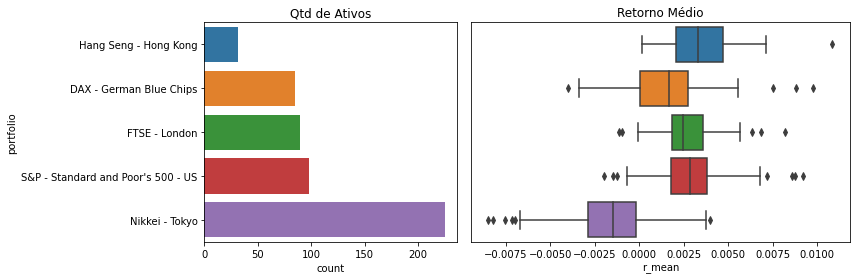

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [1, 1.5]})
sns.countplot(data=df_stats, y='portfolio', ax=ax[0])
ax[0].title.set_text('Qtd de Ativos')
sns.boxplot(data=df_stats, y='portfolio', x='r_mean', ax=ax[1])
ax[1].title.set_text("Retorno Médio")
ax[1].get_yaxis().set_ticks([])
ax[1].set_ylabel('')
fig.tight_layout()

### Matriz de Covariância

In [18]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j].describe().T

count        mean        std       min        25%         50%  \
port  37904.0    4.336350   1.068738  1.000000   4.000000    5.000000   
i     37904.0   60.152728  49.736086  1.000000  20.000000   46.000000   
j     37904.0  120.305456  62.150969  2.000000  68.000000  113.000000   
cov   37904.0    0.388782   0.166550 -0.145815   0.258983    0.419793   

            75%         max  
port    5.00000    5.000000  
i      88.00000  224.000000  
j     178.00000  225.000000  
cov     0.51717    0.909412

In [19]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j]['cov'].hist()

<AxesSubplot:>

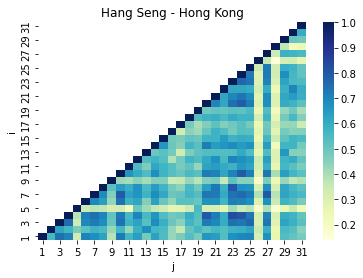

In [20]:
portfolio = 1
df_cov_pivot = df_cov_mx[df_cov_mx.port==portfolio].pivot(index='i', columns='j', values='cov')
sns.heatmap(df_cov_pivot.iloc[::-1], cmap="YlGnBu") 
plt.title(portfolios[portfolio])
ax=ax

### Fronteiras de Eficiência Irrestrira - UEF

In [21]:
uef.head()

mean_return  var_return  port              portfolio
0     0.010865    0.004776     1  Hang Seng - Hong Kong
1     0.010861    0.004768     1  Hang Seng - Hong Kong
2     0.010857    0.004760     1  Hang Seng - Hong Kong
3     0.010853    0.004752     1  Hang Seng - Hong Kong
4     0.010849    0.004745     1  Hang Seng - Hong Kong

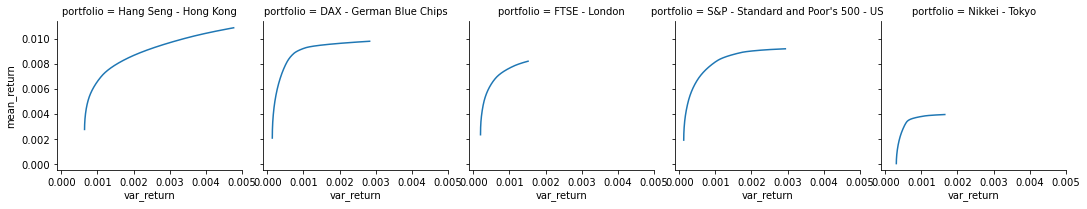

In [22]:
g = sns.relplot(data=uef, y='mean_return', x='var_return', col='portfolio', kind='line', height=3)
ax=ax

## Curvas de Aprendizado

### Avaliação do Impacto da Seed

In [23]:
all_data.head()

iter       obj   aug_obj    return  \
0     0  0.043447  0.043447  0.002783   
1     1  0.034563  0.034563  0.002796   
2     2  0.028650  0.028650  0.002804   
3     3  0.024449  0.024449  0.002809   
4     4  0.021316  0.021316  0.002813   

                                                   X  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   Z  max_iter  neighbours  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   

   alpha  exp_return  n_port  k move_str  seed selec_str  \
0    0.1       0.001       4  3     best    49    random   
1    0.1       0.001       4  3     best    49    random   
2    0.1       0.001       4  3     best    49    random   
3    0.1       0.001       4  3     best    49    random   
4    0.1       0.001       4  3     best    49    random   

                             filename    Q  
0  log_gls_20211116_204909_283918.csv  3.0  
1  log_gls_20211116_204909_283918.csv  3.0  
2  log_gls_20211116_204909_283918.csv  3.0  
3  log_gls_20211116_204909_283918.csv  3.0  
4  log_gls_20211116_204909_283918.csv  3.0

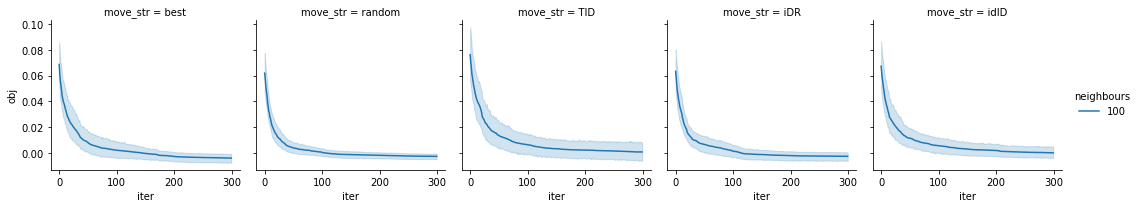

In [25]:
g = sns.FacetGrid(
    data=all_data, col='move_str', hue='neighbours')
g.map(sns.lineplot, 'iter', 'obj')
g.add_legend()
g=g

In [26]:
g = sns.FacetGrid(
    data=all_data[all_data.iter>100], col='move_str', hue='neighbours')
g.map(sns.lineplot, 'iter', 'obj')
g.add_legend()
g=g

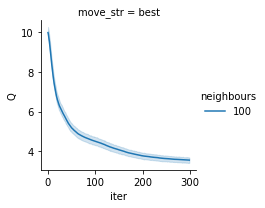

In [200]:
g = sns.FacetGrid(
    data=all_data, col='move_str', hue='neighbours')
g.map(sns.lineplot, 'iter', 'Q')
g.add_legend()
g=g

In [201]:
# g = sns.FacetGrid(
#     data=all_data, row='seed', col='selec_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Tipo de Move

In [202]:
# g = sns.FacetGrid(
#     data=all_data, row='selec_str', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Impacto do Retorno Experado

In [203]:
# g = sns.FacetGrid(
#     data=all_data, row='exp_return', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

## Análise Best - Portfólio 1

In [204]:
df_stats[df_stats.port==1].describe().T

count       mean       std       min       25%        50%        75%  \
port     31.0   1.000000  0.000000  1.000000  1.000000   1.000000   1.000000   
i        31.0  16.000000  9.092121  1.000000  8.500000  16.000000  23.500000   
r_mean   31.0   0.003504  0.002186  0.000141  0.002043   0.003286   0.004725   
r_std    31.0   0.045723  0.007296  0.035848  0.040043   0.045450   0.050112   

              max  
port     1.000000  
i       31.000000  
r_mean   0.010865  
r_std    0.069105

In [226]:
print(best_data.shape)
best_data.drop(['X', 'Z',],axis=1,).head()

(2044, 18)


iter       obj   aug_obj    return  max_iter  neighbours  alpha  \
0    99  0.000023  0.000023  0.001001       300         100    0.1   
1    99  0.000002  0.000002  0.003789       300         100    0.1   
2    99  0.000002  0.000002  0.002363       300         100    0.1   
3    99  0.000002  0.000002  0.002364       300         100    0.1   
4    99  0.000019  0.000019  0.000277       300         100    0.1   

   exp_return  n_port   k move_str  seed selec_str  \
0       0.001       1  20     best     8      best   
1       0.003       1  16     best     3      best   
2       0.002       1   7     best     1      best   
3       0.001       1   1     best     1      best   
4       0.005       1   2     best     4      best   

                             filename     Q   min_obj  
0  log_gls_20211116_175629_801715.csv  10.0  0.000003  
1  log_gls_20211116_175629_801715.csv   2.0  0.000002  
2  log_gls_20211116_175629_801715.csv   2.0  0.000002  
3  log_gls_20211116_175629_801715.csv   2.0  0.000002  
4  log_gls_20211116_175629_801715.csv   2.0  0.000004

In [206]:
best_data.describe().T

count        mean           std           min         25%  \
iter        2044.0   99.000000  0.000000e+00  9.900000e+01   99.000000   
obj         2044.0    0.000197  7.031540e-04  3.913343e-07    0.000002   
aug_obj     2044.0    0.000197  7.031540e-04  3.913343e-07    0.000002   
return      2044.0    0.003332  2.129161e-03  1.410000e-04    0.002006   
max_iter    2044.0  300.000000  0.000000e+00  3.000000e+02  300.000000   
neighbours  2044.0  100.000000  0.000000e+00  1.000000e+02  100.000000   
alpha       2044.0    0.100000  1.388118e-17  1.000000e-01    0.100000   
exp_return  2044.0    0.002975  1.978924e-03  1.000000e-03    0.002000   
n_port      2044.0    1.000000  0.000000e+00  1.000000e+00    1.000000   
k           2044.0   10.144814  6.818360e+00  1.000000e+00    4.000000   
seed        2044.0   12.223581  7.021707e+00  0.000000e+00    7.000000   
Q           2044.0    4.514188  4.689612e+00  1.000000e+00    2.000000   

                   50%         75%         max  
iter         99.000000   99.000000   99.000000  
obj           0.000004    0.000064    0.005817  
aug_obj       0.000004    0.000064    0.005817  
return        0.003004    0.004712    0.010780  
max_iter    300.000000  300.000000  300.000000  
neighbours  100.000000  100.000000  100.000000  
alpha         0.100000    0.100000    0.100000  
exp_return    0.003000    0.004000    0.010000  
n_port        1.000000    1.000000    1.000000  
k             9.500000   15.000000   31.000000  
seed         12.000000   19.000000   24.000000  
Q             2.000000    6.000000   27.000000

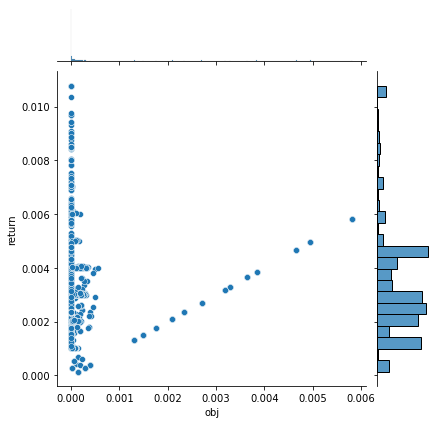

In [207]:
sns.jointplot(data=best_data, x='obj', y='return', palette='bright')

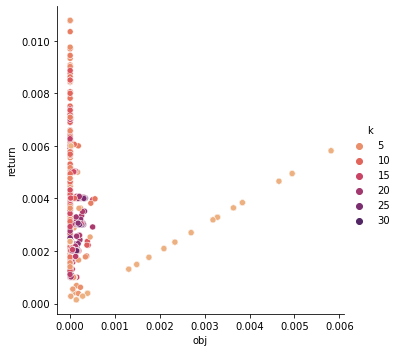

In [208]:
sns.relplot(data=best_data[best_data.obj<0.05], x='obj', y='return', hue='k', palette='flare')

In [209]:
g = sns.FacetGrid(data=best_data, col='move_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

In [210]:
g = sns.FacetGrid(data=best_data, col='selec_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

In [211]:
g = sns.FacetGrid(data=best_data, hue='k')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

In [212]:
best_data.describe().T

count        mean           std           min         25%  \
iter        2044.0   99.000000  0.000000e+00  9.900000e+01   99.000000   
obj         2044.0    0.000197  7.031540e-04  3.913343e-07    0.000002   
aug_obj     2044.0    0.000197  7.031540e-04  3.913343e-07    0.000002   
return      2044.0    0.003332  2.129161e-03  1.410000e-04    0.002006   
max_iter    2044.0  300.000000  0.000000e+00  3.000000e+02  300.000000   
neighbours  2044.0  100.000000  0.000000e+00  1.000000e+02  100.000000   
alpha       2044.0    0.100000  1.388118e-17  1.000000e-01    0.100000   
exp_return  2044.0    0.002975  1.978924e-03  1.000000e-03    0.002000   
n_port      2044.0    1.000000  0.000000e+00  1.000000e+00    1.000000   
k           2044.0   10.144814  6.818360e+00  1.000000e+00    4.000000   
seed        2044.0   12.223581  7.021707e+00  0.000000e+00    7.000000   
Q           2044.0    4.514188  4.689612e+00  1.000000e+00    2.000000   

                   50%         75%         max  
iter         99.000000   99.000000   99.000000  
obj           0.000004    0.000064    0.005817  
aug_obj       0.000004    0.000064    0.005817  
return        0.003004    0.004712    0.010780  
max_iter    300.000000  300.000000  300.000000  
neighbours  100.000000  100.000000  100.000000  
alpha         0.100000    0.100000    0.100000  
exp_return    0.003000    0.004000    0.010000  
n_port        1.000000    1.000000    1.000000  
k             9.500000   15.000000   31.000000  
seed         12.000000   19.000000   24.000000  
Q             2.000000    6.000000   27.000000

In [213]:
df_stats[df_stats.port==1].describe().T

count       mean       std       min       25%        50%        75%  \
port     31.0   1.000000  0.000000  1.000000  1.000000   1.000000   1.000000   
i        31.0  16.000000  9.092121  1.000000  8.500000  16.000000  23.500000   
r_mean   31.0   0.003504  0.002186  0.000141  0.002043   0.003286   0.004725   
r_std    31.0   0.045723  0.007296  0.035848  0.040043   0.045450   0.050112   

              max  
port     1.000000  
i       31.000000  
r_mean   0.010865  
r_std    0.069105

In [214]:
uef[uef.port==1].describe().T

count      mean       std       min       25%       50%  \
mean_return  2000.0  0.006825  0.002334  0.002784  0.004804  0.006825   
var_return   2000.0  0.001579  0.001116  0.000642  0.000716  0.001058   
port         2000.0  1.000000  0.000000  1.000000  1.000000  1.000000   

                  75%       max  
mean_return  0.008845  0.010865  
var_return   0.002150  0.004776  
port         1.000000  1.000000

Text(0, 0.5, 'mean_return')

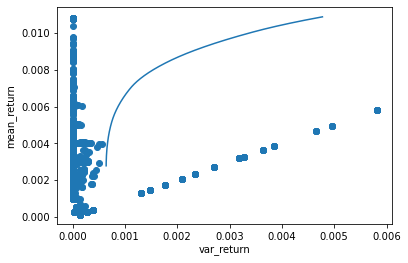

In [215]:
data = best_data[best_data['obj']<0.05]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

In [216]:
best_data.describe().T

count        mean           std           min         25%  \
iter        2044.0   99.000000  0.000000e+00  9.900000e+01   99.000000   
obj         2044.0    0.000197  7.031540e-04  3.913343e-07    0.000002   
aug_obj     2044.0    0.000197  7.031540e-04  3.913343e-07    0.000002   
return      2044.0    0.003332  2.129161e-03  1.410000e-04    0.002006   
max_iter    2044.0  300.000000  0.000000e+00  3.000000e+02  300.000000   
neighbours  2044.0  100.000000  0.000000e+00  1.000000e+02  100.000000   
alpha       2044.0    0.100000  1.388118e-17  1.000000e-01    0.100000   
exp_return  2044.0    0.002975  1.978924e-03  1.000000e-03    0.002000   
n_port      2044.0    1.000000  0.000000e+00  1.000000e+00    1.000000   
k           2044.0   10.144814  6.818360e+00  1.000000e+00    4.000000   
seed        2044.0   12.223581  7.021707e+00  0.000000e+00    7.000000   
Q           2044.0    4.514188  4.689612e+00  1.000000e+00    2.000000   

                   50%         75%         max  
iter         99.000000   99.000000   99.000000  
obj           0.000004    0.000064    0.005817  
aug_obj       0.000004    0.000064    0.005817  
return        0.003004    0.004712    0.010780  
max_iter    300.000000  300.000000  300.000000  
neighbours  100.000000  100.000000  100.000000  
alpha         0.100000    0.100000    0.100000  
exp_return    0.003000    0.004000    0.010000  
n_port        1.000000    1.000000    1.000000  
k             9.500000   15.000000   31.000000  
seed         12.000000   19.000000   24.000000  
Q             2.000000    6.000000   27.000000

In [217]:
best_data['min_obj'] = best_data.groupby(['exp_return', 'k'])['obj'].transform(min)
best_best_data = best_data[best_data.obj==best_data.min_obj]
print(best_best_data.shape)
best_best_data.head(30)


(186, 18)


iter           obj       aug_obj    return  \
8      99  3.298225e-06  3.298225e-06  0.008628   
16     99  2.325536e-06  2.325536e-06  0.006090   
24     99  1.222679e-06  1.222679e-06  0.002587   
48     99  3.079552e-06  3.079552e-06  0.008057   
55     99  2.403866e-06  2.403866e-06  0.004767   
73     99  3.958888e-07  3.958888e-07  0.001056   
81     99  2.781929e-06  2.781929e-06  0.007281   
93     99  1.104659e-06  1.104659e-06  0.002339   
99     99  2.521744e-06  2.521744e-06  0.006602   
100    99  2.262056e-06  2.262056e-06  0.004766   
113    99  1.272549e-05  1.272549e-05  0.001009   
115    99  1.405445e-06  1.405445e-06  0.001485   
118    99  2.919603e-04  2.919603e-04  0.004024   
120    99  3.568346e-06  3.568346e-06  0.009332   
140    99  1.700266e-06  1.700266e-06  0.003588   
146    99  1.261583e-06  1.261583e-06  0.002668   
158    99  3.221310e-06  3.221310e-06  0.008427   
194    99  3.431538e-04  3.431538e-04  0.004017   
198    99  2.499110e-06  2.499110e-06  0.006543   
207    99  1.696857e-06  1.696857e-06  0.003581   
208    99  1.584518e-06  1.584518e-06  0.003345   
222    99  1.509771e-05  1.509771e-05  0.007016   
244    99  2.871907e-06  2.871907e-06  0.007516   
262    99  1.901520e-06  1.901520e-06  0.004010   
271    99  3.040938e-05  3.040938e-05  0.001042   
284    99  4.124784e-06  4.124784e-06  0.010780   
307    99  4.072373e-07  4.072373e-07  0.001019   
330    99  1.614909e-06  1.614909e-06  0.003409   
333    99  1.410000e-04  1.410000e-04  0.000141   
336    99  3.248498e-06  3.248498e-06  0.008498   

                                                     X  \
8    [0.0, 0.0, 0.0, 0.0, 0.79192882, 0.0, 0.0, 0.0...   
16   [0.0, 0.0, 0.0, 0.0, 0.55837877, 0.0, 0.0, 0.0...   
24   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
48   [0.0, 0.0, 0.0, 0.0, 0.73942376, 0.0, 0.0, 0.0...   
55   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
73   [0.0, 0.0, 0.0, 0.0, 0.0950559, 0.0, 0.0, 0.0,...   
81   [0.0, 0.0, 0.0, 0.0, 0.66796241, 0.0, 0.0, 0.0...   
93   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
99   [0.0, 0.0, 0.0, 0.0, 0.60548998, 0.0, 0.0, 0.0...   
100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
113  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029...   
115  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
118  [0.020804, 0.02932, 0.0, 0.017677, 0.048218, 0...   
120  [0.0, 0.0, 0.0, 0.0, 0.856787, 0.0, 0.0, 0.0, ...   
140  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
146  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
158  [0.0, 0.0, 0.0, 0.0, 0.7734609, 0.0, 0.0, 0.0,...   
194  [0.02248528, 0.0, 0.011917, 0.02122702, 0.0579...   
198  [0.0, 0.0, 0.0, 0.0, 0.60005528, 0.0, 0.0, 0.0...   
207  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
208  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
222  [0.0, 0.0, 0.0, 0.0, 0.63091458, 0.0, 0.0, 0.0...   
244  [0.0, 0.0, 0.0, 0.0, 0.6895666, 0.0, 0.0, 0.0,...   
262  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
271  [0.0, 0.0, 0.0, 0.015624, 0.0, 0.0, 0.01698118...   
284  [0.0, 0.0, 0.0, 0.0, 0.989996, 0.0, 0.0, 0.0, ...   
307  [0.0, 0.0, 0.0, 0.0, 0.09147422, 0.0, 0.0, 0.0...   
330  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
333  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
336  [0.0, 0.0, 0.0, 0.0, 0.77998918, 0.0, 0.0, 0.0...   

                                                     Z  max_iter  neighbours  \
8    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
16   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
24   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
48   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
55   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
73   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...       300         100   
81   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...       300

In [219]:
mask = (df_stats.port==1) & (df_stats.i==17)
df_stats[mask]

port   i    r_mean    r_std              portfolio
16     1  17  0.000282  0.04398  Hang Seng - Hong Kong

Text(0, 0.5, 'mean_return')

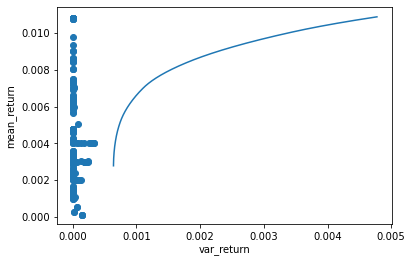

In [220]:
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(best_best_data.obj, best_best_data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

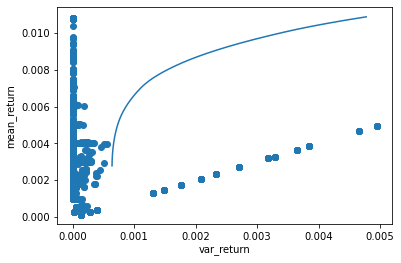

In [221]:
data = best_data[best_data['obj']<0.005]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

In [222]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .count()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

exp_return          0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  \
move_str selec_str                                                           
best     best         506    497    464    245    102     74     72     32   

exp_return          0.009  0.010  
move_str selec_str                
best     best          26     26

In [223]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .min()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

exp_return                 0.001         0.002     0.003     0.004     0.005  \
move_str selec_str                                                             
best     best       3.913343e-07  7.778511e-07  0.000001  0.000002  0.000002   

exp_return             0.006     0.007     0.008     0.009     0.010  
move_str selec_str                                                    
best     best       0.000002  0.000003  0.000004  0.000019  0.000019

In [224]:
best_best_data = best_data.groupby(['exp_return'], as_index=False)['obj'].min()
print(best_best_data.shape)
best_best_data.head()

(10, 2)


exp_return           obj
0       0.001  3.913343e-07
1       0.002  7.778511e-07
2       0.003  1.424193e-06
3       0.004  1.901520e-06
4       0.005  2.184205e-06

In [225]:
plt.plot(uef[uef.port==1].mean_return, uef[uef.port==1].var_return)
plt.plot(best_best_data.exp_return, best_best_data.obj)